In [1]:
# import packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.axislines import SubplotZero
from matplotlib import pylab
import seaborn as sns
sns.set_theme(style="whitegrid",font_scale = 1.5)
# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib.pyplot import text
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  """


# 1. Loading the data

this is the raw data of all the sensors in every 30 min.

###**start date**: $25/05/2021$

###**end date**: $31/05/2022$

In [2]:
# creat df for Vasila data:
# new_file_path ="/content/drive/MyDrive/Greenwall/co2_and_counting_people/latest.csv" #until 03/05/2022
new_file_path = "/content/drive/MyDrive/Greenwall/LoggerNet_files/latest_03062022.csv" #until 31/05/2022
df = pd.read_csv(new_file_path) # reading the raw date (csv)
df = df[3:]

# make 'Time' the dataframe index
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])
df = df.set_index('TIMESTAMP')
df =df.astype(float, errors = 'raise') #change dtype to float

# keep with relevant columns:
df = df[['Temp_in_Avg','Rh_in_Avg','Temp_out_Avg','Rh_out_Avg']]
# rename the column names:
df.columns = ['Temp_in','RH_in','Temp_out','RH_out']
# df.describe()
# df.dtypes
df = df.loc[:"2022-06-01 00:00:00"] #set the final date
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Temp_in,RH_in,Temp_out,RH_out
TIMESTAMP,,,,
2021-05-25 13:27:00,24.08,63.13,30.56,49.31
2021-05-25 13:28:00,19.61,59.49,25.51,45.96
2021-05-25 13:28:30,24.17,63.90,30.53,49.26
2021-05-25 13:29:00,24.23,63.98,30.48,49.22
2021-05-25 13:29:30,20.05,59.89,25.66,45.99
...,...,...,...,...
2022-05-31 23:58:00,25.56,71.55,22.16,86.50
2022-05-31 23:58:30,25.64,71.53,22.17,86.40
2022-05-31 23:59:00,25.69,71.45,22.19,86.40


# 2. Vizualization

##2.1 One hour mean resample

In [3]:
df_hour = df.resample("H").mean()

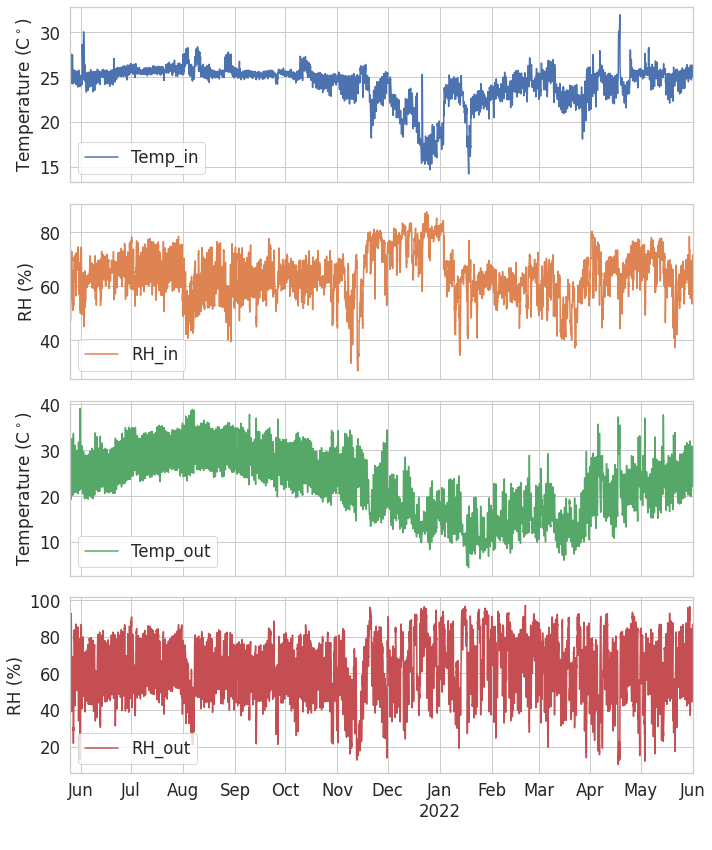

In [4]:
axes = df_hour.plot(subplots=True, figsize=(10, 12),xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_hour_resample_time_series.png')

<!-- ##2.2 One day mean resample -->

In [5]:
df_day = df.resample("D").mean()

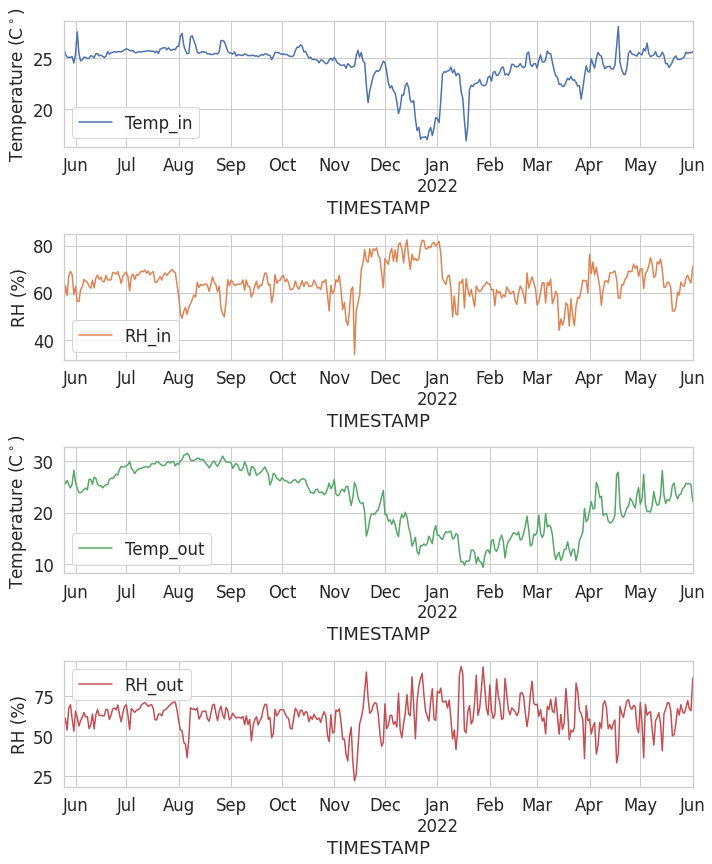

In [6]:
axes = df_day.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = False)
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_day_resample_time_series.png')

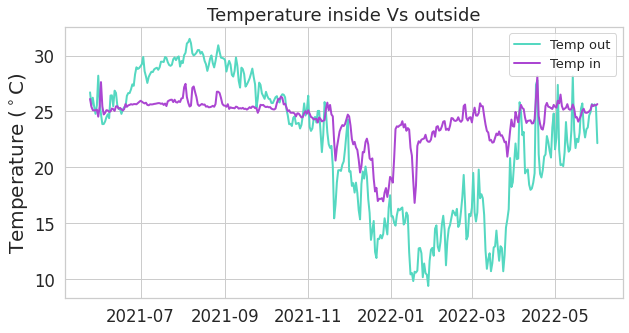

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
# out
ax.plot(df_day['Temp_out'],linewidth=2,color ="#55D8C1",label = "Temp out")
# ax.plot(df_hour['Temp_out'],alpha=.3,color ="#55D8C1")
# in
ax.plot(df_day['Temp_in'],linewidth=2,color ="#AB46D2",label = "Temp in")
# ax.plot(df_hour['Temp_in'],alpha=.3,color ="#AB46D2")


ax.set_ylabel('Temperature ($^\circ$C)',fontsize=20)
ax.set_title("Temperature inside Vs outside") #title
plt.legend(fontsize = 13)
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'temperute.png',bbox_inches = "tight")

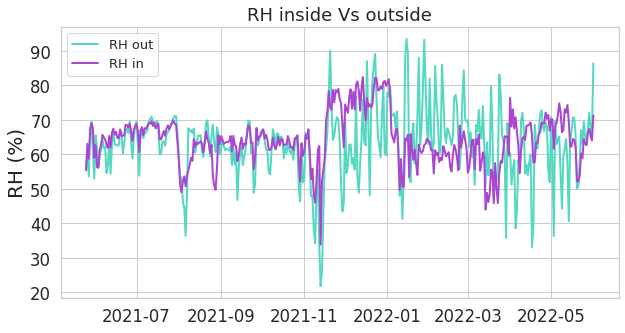

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
# out
ax.plot(df_day['RH_out'],linewidth=2,color ="#55D8C1",label = "RH out")
# ax.plot(df_hour['RH_out'],alpha=.3,color ="#55D8C1")
# in
ax.plot(df_day['RH_in'],linewidth=2,color ="#AB46D2",label = "RH in")
# ax.plot(df_hour['RH_in'],alpha=.3,color ="#AB46D2")

ax.set_ylabel('RH (%)',fontsize=20)
ax.set_title("RH inside Vs outside") #title
plt.legend(fontsize = 13)
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'rh.png',bbox_inches = "tight")

# Seasons

## Winter

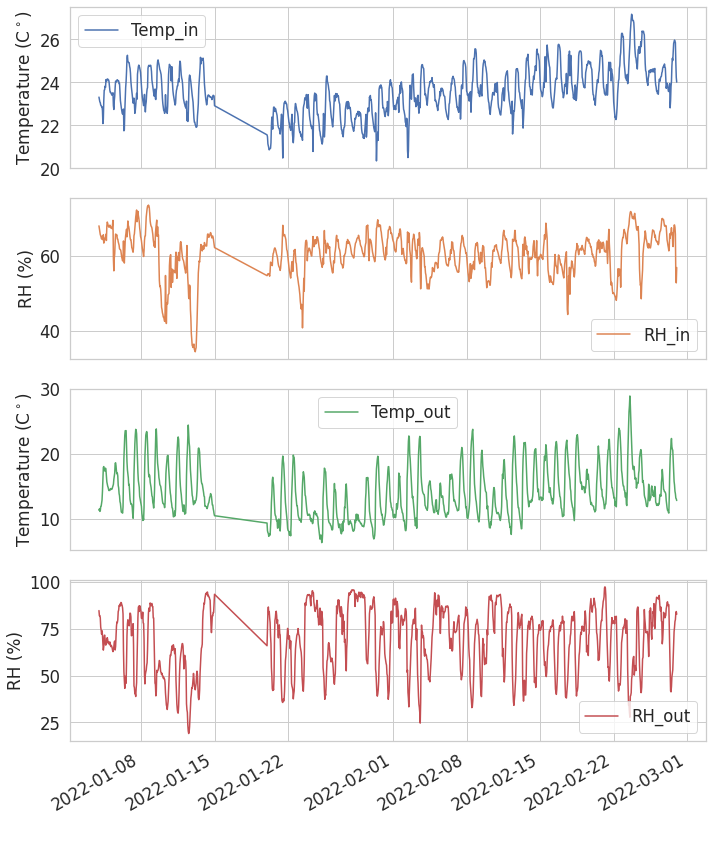

In [9]:
start_winter = "2022-01-20 00:00:00"
end_winter = '2022-02-28 00:00:00'
df_winter1 =df_hour.loc[start_winter:end_winter]
start_winter = "2022-01-04 00:00:00"
end_winter = '2022-01-15 00:00:00'
df_winter2 =df_hour.loc[start_winter:end_winter]

df_winter = pd.concat([df_winter2,df_winter1])
axes = df_winter.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_hour_resample_winter.png')

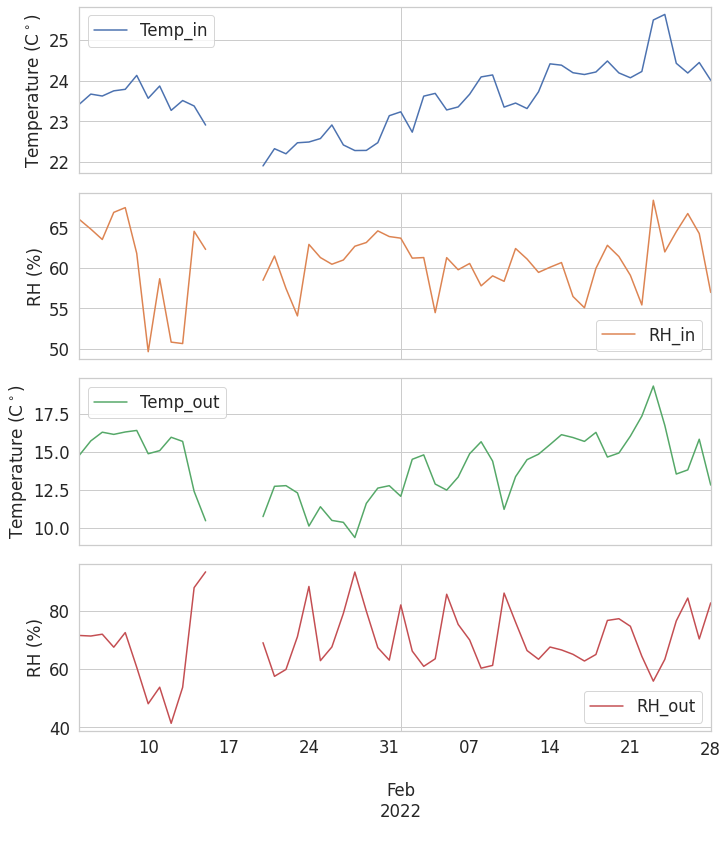

In [10]:
df_winter_day = df_winter.resample("D").mean()
axes = df_winter_day.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_day_resample_winter.png')

## Summer

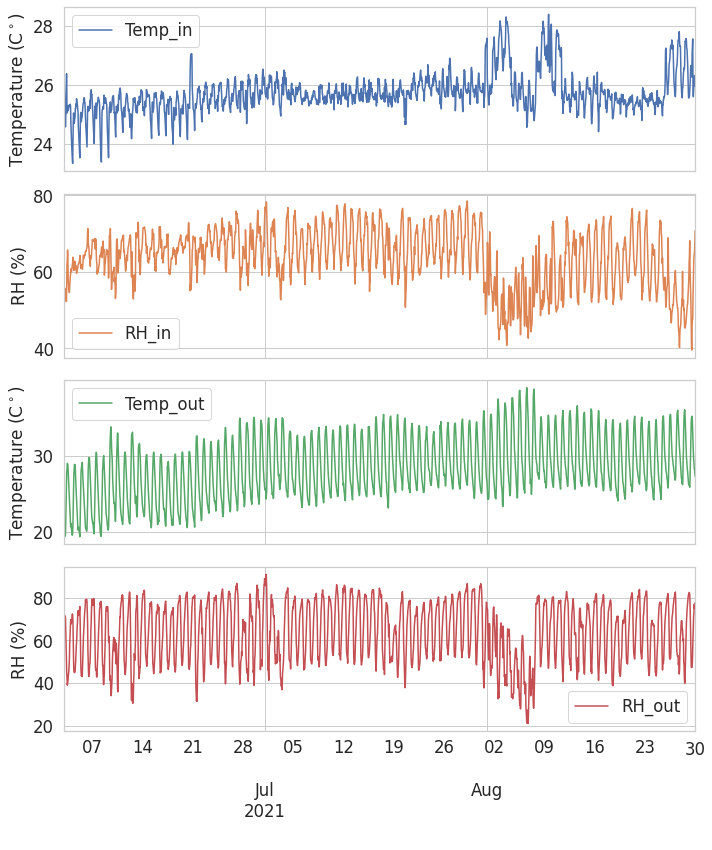

In [11]:
start_summer = "2021-06-03 00:00:00"
end_summer = '2021-08-30 00:00:00'
df_summer =df_hour.loc[start_summer:end_summer]
axes = df_summer.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_hour_resample_summer.png')

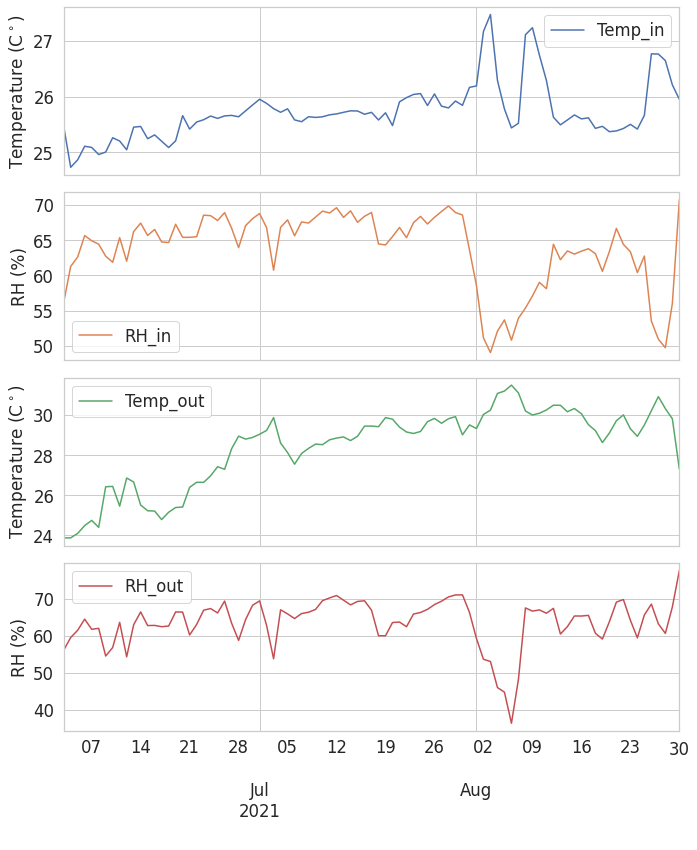

In [12]:
df_summer_day = df_summer.resample("D").mean()
axes = df_summer_day.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_summer.png')

## Autumn

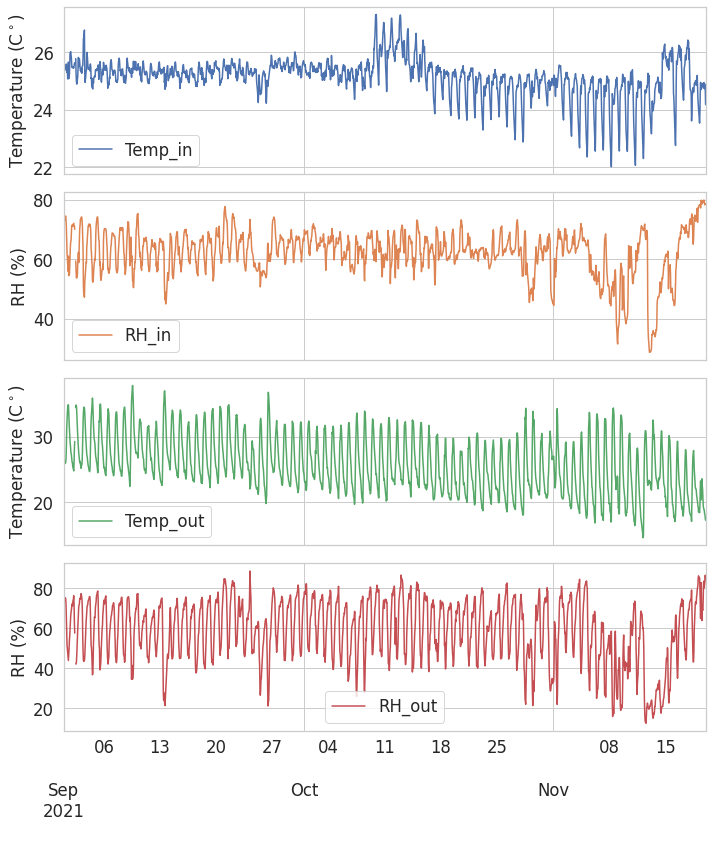

In [13]:
start_autumn = "2021-09-01 00:00:00"
end_autumn = '2021-11-20 00:00:00'
df_autumn =df_hour.loc[start_autumn:end_autumn]
axes = df_autumn.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_hour_resample_autumn.png')

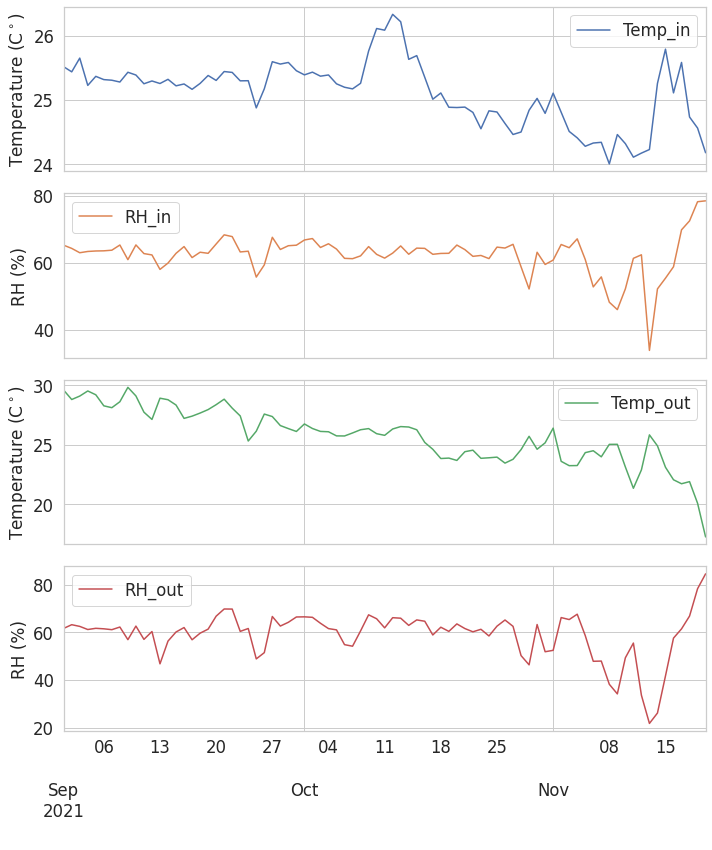

In [14]:
df_autumn_day = df_autumn.resample("D").mean()
axes = df_autumn_day.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_day_resample_autumn.png')

## Spring

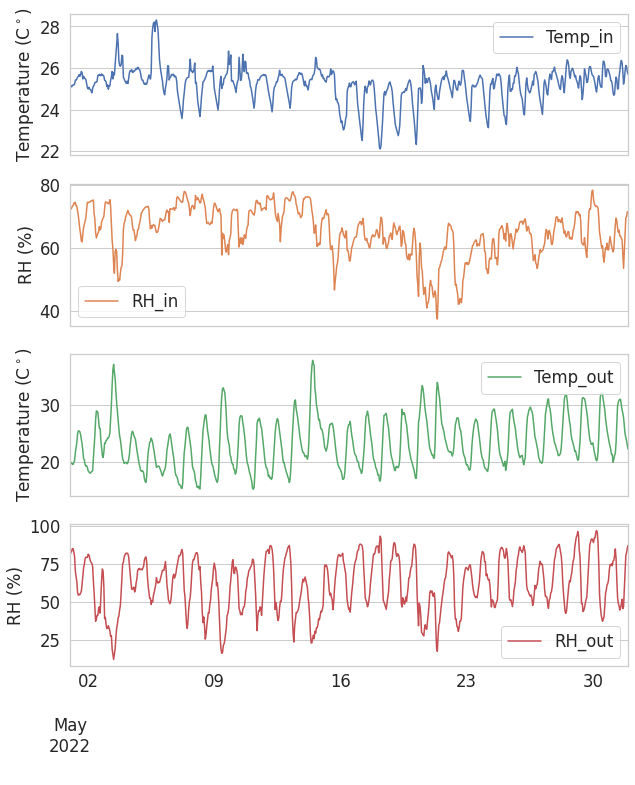

In [15]:
start_spring = "2022-05-01 00:00:00"
end_spring = '2022-05-31 23:59:00'
df_spring =df_hour.loc[start_spring:end_spring]
axes = df_spring.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.savefig(save_results_to + 'one_hour_resample_spring.png')

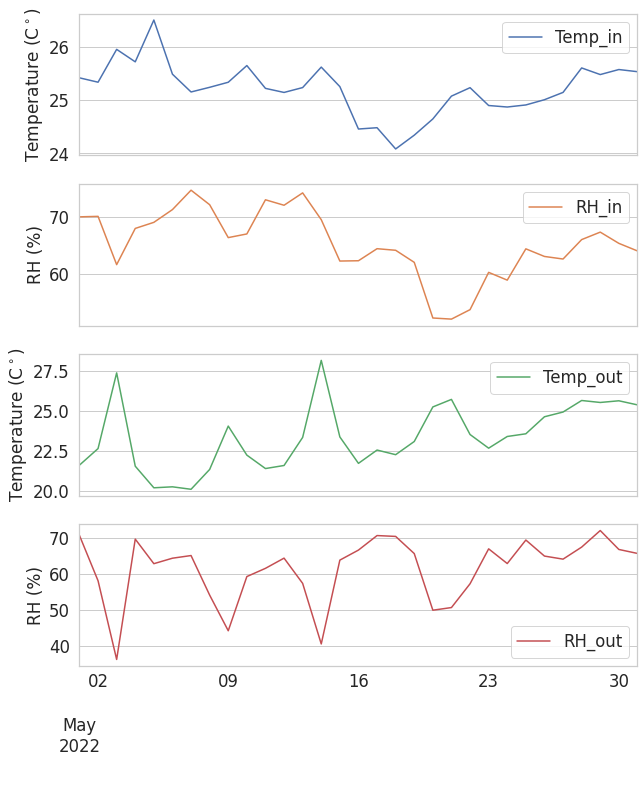

In [16]:
df_spring_day = df_spring.resample("D").mean()
axes = df_spring_day.plot(subplots=True, figsize=(10, 12),sharey = False,sharex = True,xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.savefig(save_results_to + 'one_day_resample_spring.png')

### Information on every season:

In [17]:
dfs = ["df_summer_day","df_autumn_day","df_winter_day","df_spring_day"]
convert_dict = {"df_summer_day":df_summer_day,"df_autumn_day":df_autumn_day,"df_winter_day":df_winter_day,"df_spring_day":df_spring_day}

In [18]:
for i in dfs:
  print(i)
  print(convert_dict[i].describe())

df_summer_day
         Temp_in      RH_in   Temp_out     RH_out
count  89.000000  89.000000  89.000000  89.000000
mean   25.728097  63.803902  28.447181  63.700481
std     0.506936   5.299833   1.945636   6.300439
min    24.732198  49.034035  23.866069  36.385906
25%    25.463875  62.237618  27.294035  61.568035
50%    25.652962  65.372969  29.042976  65.406312
75%    25.848833  67.599986  29.834708  67.428333
max    27.470476  70.743750  31.497059  77.736000
df_autumn_day
         Temp_in      RH_in   Temp_out     RH_out
count  81.000000  81.000000  81.000000  81.000000
mean   25.114131  62.405642  25.751449  58.963553
std     0.501849   6.014235   2.355804   9.917236
min    24.005056  33.858431  17.279667  21.876382
25%    24.808271  61.297927  23.999399  56.885392
50%    25.250142  63.194174  26.001080  61.470663
75%    25.389344  65.084681  27.429535  64.204007
max    26.330354  78.558417  29.827743  84.474167
df_winter_day
         Temp_in      RH_in   Temp_out     RH_out
count  5

##  Density plots

every sample is a day maen and just from the days that the AC works well.

In [19]:
# dict for graphs:
pallete_dict = {'df_summer_day':"#333C83","df_autumn_day":"#F24A72", "df_winter_day":"#FDAF75", "df_spring_day":"#EAEA7F"} #dictionary for colors
ax_dict = {"df_summer_day":0,"df_autumn_day":1,"df_winter_day":2,"df_spring_day":3}
title_dict = {"df_summer_day":"Summer","df_autumn_day":"Autumn","df_winter_day":"Winter","df_spring_day":"Spring"}
label_dict = {"df_summer_day":"Summer","df_autumn_day":"Autumn","df_winter_day":"Winter","df_spring_day":"Spring"}
color_dict = {"df_summer_day":"#F9D923","df_autumn_day":"#36AE7C","df_winter_day":"#187498","df_spring_day":"#EB5353"}

Create comfort zone borders:

In [20]:
# 0 m/s comfort zone borders
df1 = pd.DataFrame({'x_bot':[18, 25, 27],'y_bot': [20,20,20],'y_top': [70, 70, 50],
                    "x_left":[18,18,18],"y_left":[20,50,70],
                    "x_right":[25,27,27],"y_right":[70,50,20]})
# 1 m/s comfort zone borders
df2 = pd.DataFrame({'x_bot':[20,27,33],'y_bot': [20,20,20],'y_top': [95,95,50],
                    "x_left":[20,20,20],"y_left":[20,50,95],
                    "x_right":[27,33,33],"y_right":[95,50,20]})
# # graph:
# fig, ax = plt.subplots(1, figsize=(8,6))
# # 0 m/s comfort zone borders
# ax.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
# ax.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
# ax.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
# ax.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")

# # 1 m/s comfort zone borders
# ax.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
# plt.legend()
# plt.tight_layout()

In [21]:
# fig, axes = plt.subplots(1, 4,sharex=True,sharey = True, figsize=(15,5))
# # fig.suptitle('Temperature and RH distribution inside and outside',fontsize = 20)
# for season in dfs:
#   ax = sns.scatterplot(ax=axes[ax_dict[season]],data=convert_dict[season], x="Temp_in", y='RH_in',color ="#006E7F", label="In")
#   ax = sns.scatterplot(ax=axes[ax_dict[season]],data=convert_dict[season], x="Temp_out", y='RH_out',color ="#B22727", label="Out")
#   # comfort zone borders
#   ax.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
#   ax.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
#   ax.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
#   ax.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
#   # 1 m/s comfort zone borders
#   ax.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
#   ax.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
#   ax.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
#   ax.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
#   # ax.set_xlim(10,32)
#   # ax.set_ylim(20,90)
#   ax.set_xlabel(" ")
#   ax.set_ylabel('RH (%)',fontsize=25) #y label
#   ax.set_title(title_dict[season]) #title
# plt.legend()
# plt.subplots_adjust(hspace = .5,wspace=.3) #adjust the borders between the graph
# fig.text(0.5, 0.01, 'Temperature ($^\circ$C)', va='center', ha='center', fontsize=25)
# fig.tight_layout()
# save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# # plt.savefig(save_results_to + 'one_day_resample_joinplot_in&out.png')

Inside Distribution during seasons:

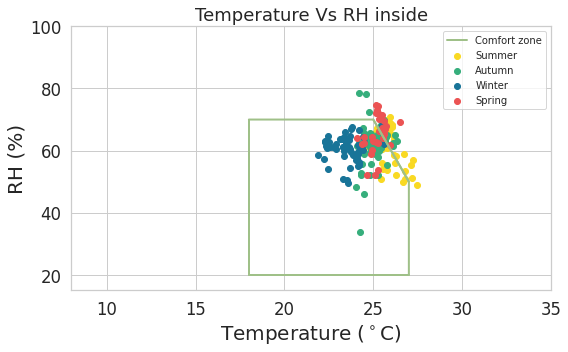

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for season in dfs:
  ax.scatter(convert_dict[season]['Temp_in'],
             convert_dict[season]['RH_in'],
             color = color_dict[season],
             label = label_dict[season])
  # comfort zone borders
ax.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
# # 1 m/s comfort zone borders
# ax.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
# ax.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
ax.set_xlim(8,35)
ax.set_ylim(15,100)
ax.set_xlabel('Temperature ($^\circ$C)',fontsize=20)
ax.set_ylabel('RH (%)',fontsize=20) #y label
ax.set_title("Temperature Vs RH inside") #title
plt.legend(fontsize = 10)
fig.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_scatterplot_in.png',bbox_inches = "tight")

Outside Distribution during seasons:

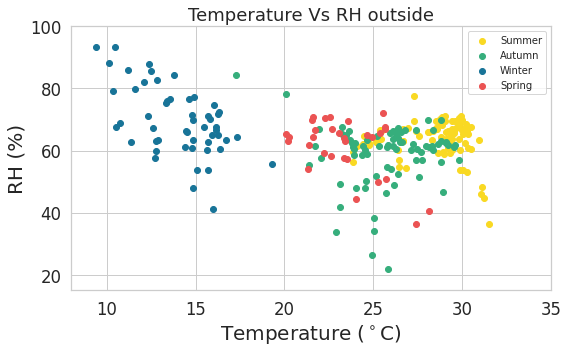

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for season in dfs:
  ax.scatter(convert_dict[season]['Temp_out'],
             convert_dict[season]['RH_out'],
             color = color_dict[season],
             label = label_dict[season])

ax.set_xlim(8,35)
ax.set_ylim(15,100)
ax.set_xlabel('Temperature ($^\circ$C)',fontsize=20)
ax.set_ylabel('RH (%)',fontsize=20) #y label
ax.set_title("Temperature Vs RH outside") #title
plt.legend(fontsize = 10)
fig.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_scatterplot_out.png',bbox_inches = "tight")

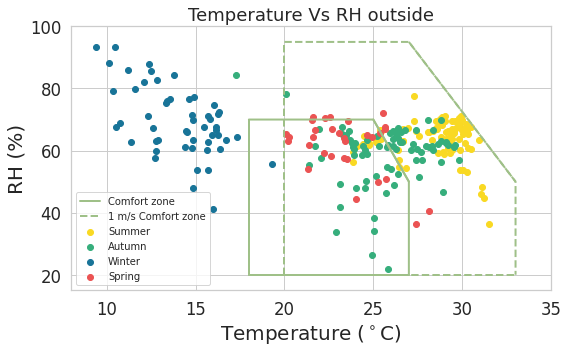

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
for season in dfs:
  ax.scatter(convert_dict[season]['Temp_out'],
             convert_dict[season]['RH_out'],
             color = color_dict[season],
             label = label_dict[season])
  # comfort zone borders
ax.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
ax.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
# 1 m/s comfort zone borders
ax.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
ax.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
ax.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
ax.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")

ax.set_xlim(8,35)
ax.set_ylim(15,100)
ax.set_xlabel('Temperature ($^\circ$C)',fontsize=20)
ax.set_ylabel('RH (%)',fontsize=20) #y label
ax.set_title("Temperature Vs RH outside") #title
plt.legend(fontsize = 10)
fig.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_scatterplot_out_with_comfort.png')

in Jointplots:

In [25]:
# # summer
# ax = sns.jointplot(ax=axes[0], x="Temp_in", y='RH_in',data=df_summer_day,xlim=(10,32),ylim = (45,90),kind="kde",fill=True, cmap='cool')
# ax.fig.suptitle("Summer",fontsize = 25)
# ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
# ax.ax_joint.set_ylabel('RH (%)') #y label
# ax.fig.tight_layout()
# save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
# plt.savefig(save_results_to + 'one_day_resample_joinplot_summer.png')

# # Autumn
# ax = sns.jointplot(ax=axes[1],data=df_autumn_day, x="Temp_in", y='RH_in',xlim=(10,32),ylim = (45,90),kind="kde",fill=True, cmap='cool')
# ax.fig.suptitle("Autumn",fontsize = 25)
# ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
# ax.ax_joint.set_ylabel('RH (%)') #y label
# ax.fig.tight_layout()
# plt.savefig(save_results_to + 'one_day_resample_joinplot_autumn.png')

# # Winter
# ax = sns.jointplot(ax=axes[2],data=df_winter_day, x="Temp_in", y='RH_in',xlim=(10,32),ylim = (45,90),kind="kde",fill=True,  cmap='cool')
# ax.fig.suptitle("Winter",fontsize = 25)
# ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
# ax.ax_joint.set_ylabel('RH (%)') #y label
# ax.fig.tight_layout()
# plt.savefig(save_results_to + 'one_day_resample_joinplot_winter.png')

# # spring
# ax = sns.jointplot(ax=axes[3],data=df_spring_day, x="Temp_in", y='RH_in',xlim=(10,32),ylim = (45,90),kind="kde",fill=True,cmap='cool')
# ax.fig.suptitle("Spring",fontsize = 25)
# ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
# ax.ax_joint.set_ylabel('RH (%)') #y label
# ax.fig.tight_layout()
# plt.savefig(save_results_to + 'one_day_resample_joinplot_spring.png')

out jointplots:

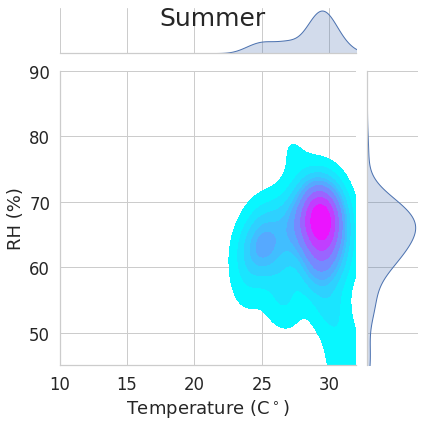

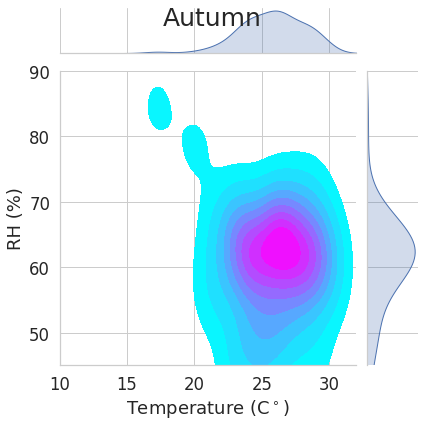

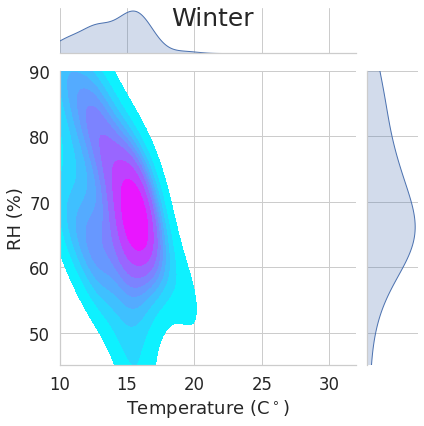

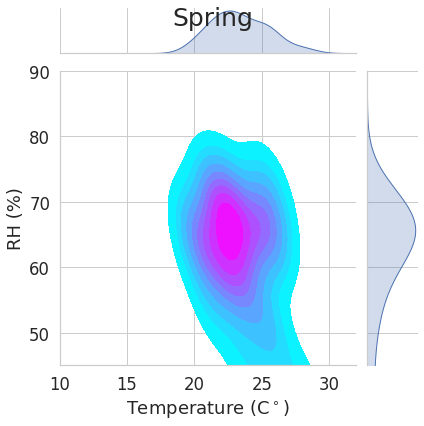

In [26]:
# summer
ax = sns.jointplot(ax=axes[0], x="Temp_out", y='RH_out',data=df_summer_day,xlim=(10,32),ylim = (45,90),kind="kde",fill=True, cmap='cool')
ax.fig.suptitle("Summer",fontsize = 25)
ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
ax.ax_joint.set_ylabel('RH (%)') #y label
ax.fig.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_joinplot_summer_out.png')

# Autumn
ax = sns.jointplot(ax=axes[1],data=df_autumn_day, x="Temp_out", y='RH_out',xlim=(10,32),ylim = (45,90),kind="kde",fill=True, cmap='cool')
ax.fig.suptitle("Autumn",fontsize = 25)
ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
ax.ax_joint.set_ylabel('RH (%)') #y label
ax.fig.tight_layout()
plt.savefig(save_results_to + 'one_day_resample_joinplot_autumn_out.png')

# Winter
ax = sns.jointplot(ax=axes[2],data=df_winter_day, x="Temp_out", y='RH_out',xlim=(10,32),ylim = (45,90),kind="kde",fill=True,  cmap='cool')
ax.fig.suptitle("Winter",fontsize = 25)
ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
ax.ax_joint.set_ylabel('RH (%)') #y label
ax.fig.tight_layout()
plt.savefig(save_results_to + 'one_day_resample_joinplot_winter_out.png')

# spring
ax = sns.jointplot(ax=axes[3],data=df_spring_day, x="Temp_out", y='RH_out',xlim=(10,32),ylim = (45,90),kind="kde",fill=True,cmap='cool')
ax.fig.suptitle("Spring",fontsize = 25)
ax.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
ax.ax_joint.set_ylabel('RH (%)') #y label
ax.fig.tight_layout()
# plt.savefig(save_results_to + 'one_day_resample_joinplot_spring_out.png')

## All seasons togather

## Daily Averege

In [27]:
df_all = pd.concat([df_summer_day,df_autumn_day,df_winter_day,df_spring_day]) # connecting the to df into 1
# Create season column:
date = df_all.index.month*100 + df_all.index.day # array of numbers contain the month num*100 + day num
df_all['season'] = (pd.cut(date,[0,228,531,831,1130,1300], #values between them there are season
                       labels=['winter','spring','summer','autumn','winter ']) #convert the month to season
                  )
df_all['season'].replace({"winter ": "winter"}, inplace=True) # make sure we do not have different values of winter
df_all['season'].unique()

['summer', 'autumn', 'winter', 'spring']
Categories (4, object): ['winter' < 'spring' < 'summer' < 'autumn']

In [28]:
df_all.describe()

,Temp_in,RH_in,Temp_out,RH_out
count,253.000000,253.000000,253.000000,253.000000
mean,25.020411,62.891472,24.005359,63.134130
std,0.980852,5.582741,5.740494,9.706788
min,21.908066,33.858431,9.378563,21.876382
25%,24.462500,60.845247,21.721229,60.137462
50%,25.261444,63.503608,25.632528,63.697493
75%,25.625760,66.440927,28.766260,67.328017
max,27.470476,78.558417,31.497059,93.301667


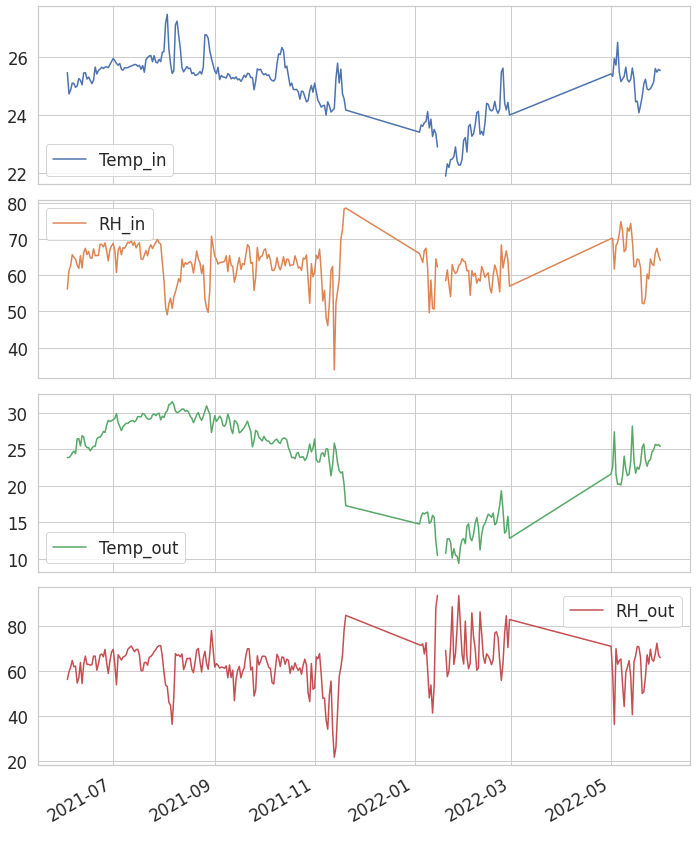

In [29]:
df_all.plot(subplots=True, figsize=(10, 12),xlabel = " ")
axes[0].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[1].set_ylabel('RH (%)',fontsize = 17)
axes[2].set_ylabel('Temperature (C$^\circ$)',fontsize = 17)
axes[3].set_ylabel('RH (%)',fontsize = 17)
plt.tight_layout()
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_all_clean_data.png')

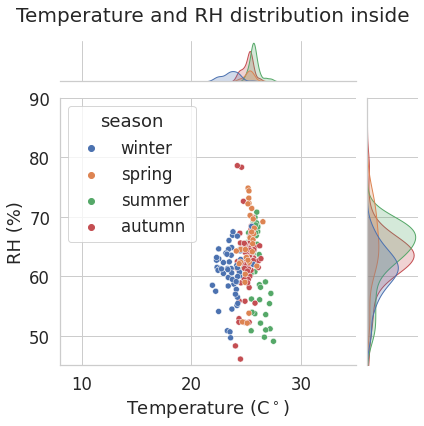

In [30]:
p = sns.jointplot(x="Temp_in", y="RH_in",hue = "season",height = 6, data=df_all,xlim=(8,35),ylim = (45,90))
# sns.jointplot(x="Temp_out", y="RH_out",hue = "season",height = 6, data=df_all,xlim=(8,35),ylim = (45,90))
p.fig.suptitle("Temperature and RH distribution inside",fontsize = 20)
# p.ax_joint.collections[0].set_alpha(0)
p.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
p.ax_joint.set_ylabel('RH (%)') #y label
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9) # Reduce plot to make room
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_joinplot_in.png')

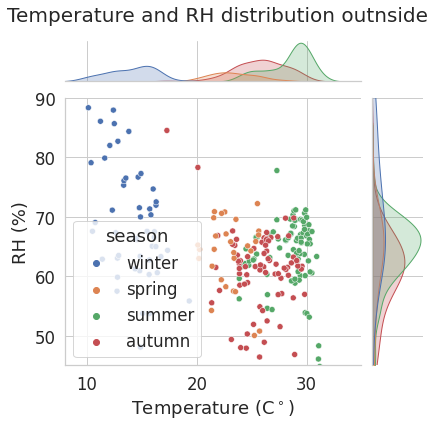

In [31]:
p = sns.jointplot(x="Temp_out", y="RH_out",hue = "season",height = 6, data=df_all,xlim=(8,35),ylim = (45,90))
p.fig.suptitle("Temperature and RH distribution outnside",fontsize = 20)
p.ax_joint.set_xlabel('Temperature (C$^\circ$)') # x label
p.ax_joint.set_ylabel('RH (%)') #y label
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.9) # Reduce plot to make room
save_results_to = '/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/'
plt.savefig(save_results_to + 'one_day_resample_joinplot_out.png')

## 3 hours resample all seasons + day night

In [32]:
df_all_hourly = pd.concat([df_summer,df_autumn,df_winter,df_spring]) # connecting the to df into 1
df_all_hourly = df_all_hourly.resample("3H").mean()
# Create season column:
date = df_all_hourly.index.month*100 + df_all_hourly.index.day # array of numbers contain the month num*100 + day num
df_all_hourly['season'] = (pd.cut(date,[0,228,531,831,1130,1300], #values between them there are season
                       labels=['winter','spring','summer','autumn','winter ']) #convert the month to season
                  )
df_all_hourly['season'].replace({"winter ": "winter"}, inplace=True) # make sure we do not have different values of winter
df_all_hourly['season'].unique()

['summer', 'autumn', 'winter', 'spring']
Categories (4, object): ['winter' < 'spring' < 'summer' < 'autumn']

In [33]:
def f(x):
    if (x.hour > 7) and (x.hour <= 24):
        return 'Day'
    else:
        return'Night'

df_all_hourly['day_night'] = df_all_hourly.index.to_series().apply(f)
df_all_hourly

,Temp_in,RH_in,Temp_out,RH_out,season,day_night
TIMESTAMP,,,,,,
2021-06-03 00:00:00,26.523361,50.230750,20.683694,67.785722,summer,Night
2021-06-03 03:00:00,25.153361,52.829889,19.513972,71.250861,summer,Night
2021-06-03 06:00:00,25.070194,55.053417,21.733222,63.118306,summer,Night
2021-06-03 09:00:00,25.932667,56.431889,27.221306,45.687222,summer,Day
2021-06-03 12:00:00,25.249944,64.028444,28.933111,39.783528,summer,Day
...,...,...,...,...,...,...
2022-05-31 09:00:00,25.197583,65.684528,30.303167,49.629500,spring,Day
2022-05-31 12:00:00,26.138417,63.525583,30.581889,46.253278,spring,Day
2022-05-31 15:00:00,25.775056,58.073500,28.417361,47.922750,spring,Day


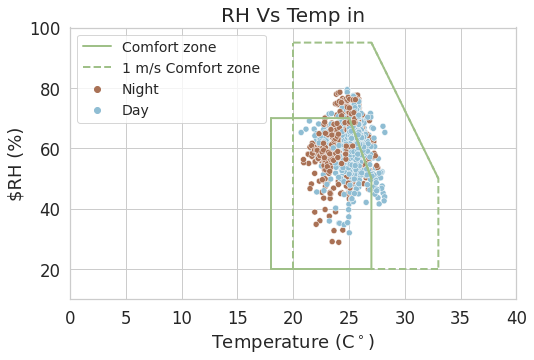

In [34]:
plt.subplots(1, figsize=(8,5))
a = sns.scatterplot(x="Temp_in",y="RH_in",data=df_all_hourly,hue='day_night',palette=["#A97155","#8FBDD3"])
# a = sns.jointplot(x="Temp_in",y="RH_in",data=df_all_hourly,hue='day_night',palette=["#A97155","#8FBDD3"],kind="kde",fill=True)
  # comfort zone borders
a.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
a.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
a.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
a.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
# 1 m/s comfort zone borders
a.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
a.set_ylabel("$RH (%)",fontsize = 18)
a.set_xlabel("Temperature (C$^\circ$)")
a.set_title("RH Vs Temp in",fontsize = 20 )
a.set_xlim(0,40)
a.set_ylim(10,100)
plt.legend(fontsize = 14)
# save:
plt.savefig(save_results_to + 'daytime_in.png',bbox_inches = "tight")

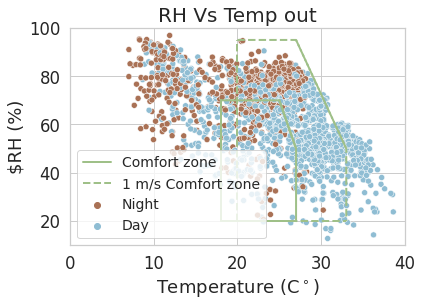

In [35]:
plt.subplots(1, figsize=(6,4))
a = sns.scatterplot(x="Temp_out",y="RH_out",data=df_all_hourly,hue='day_night',palette=["#A97155","#8FBDD3"])
a.set_ylabel("$RH (%)",fontsize = 18)
a.set_xlabel("Temperature (C$^\circ$)")
a.set_title("RH Vs Temp out",fontsize = 20)
  # comfort zone borders
a.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
a.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
a.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
a.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
# 1 m/s comfort zone borders
a.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
a.set_xlim(0,40)
a.set_ylim(10,100)
plt.legend(fontsize = 14)
# save:
plt.savefig(save_results_to + 'daytime_out.png',bbox_inches = "tight")

Density plots:
1. define day and night dfs
2. plot them with density plots

In [36]:
from scipy.stats import gaussian_kde
day = df_all_hourly[df_all_hourly['day_night']=="Day"]
night = df_all_hourly[df_all_hourly['day_night']=="Night"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()


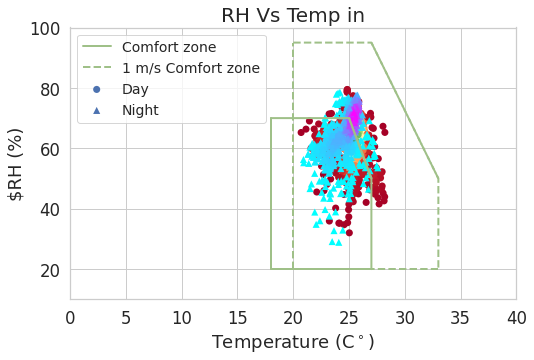

In [37]:
fig, a = plt.subplots(1, figsize=(8,5))
# Day
x = day['Temp_in']
y = day['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
a.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = 'RdYlGn',label = "Day")

# Night
x = night['Temp_in']
y = night['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
a.scatter(x[mask], y[mask], c=z, s=50,marker="^" ,linewidths=5,edgecolor='',cmap = 'cool',label = "Night")

a.set_ylabel("$RH (%)",fontsize = 18)
a.set_xlabel("Temperature (C$^\circ$)")
a.set_title("RH Vs Temp in",fontsize = 20)
  # comfort zone borders
a.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="#9FC088")
a.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="#9FC088")
a.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="#9FC088")
a.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="#9FC088",label = "Comfort zone")
# 1 m/s comfort zone borders
a.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="#9FC088",ls = '--')
a.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
a.set_xlim(0,40)
a.set_ylim(10,100)
plt.legend(fontsize = 14)
# save:
plt.savefig(save_results_to + 'daytime_in_scatter.png',bbox_inches = "tight")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  app.launch_new_instance()


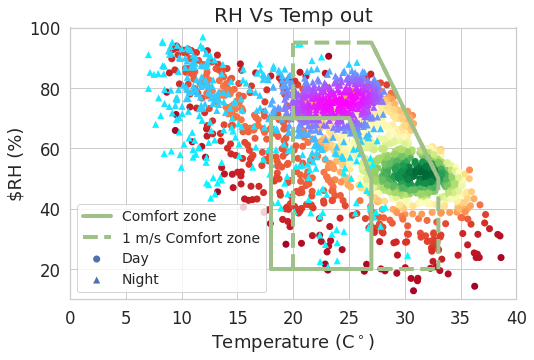

In [38]:
fig, a = plt.subplots(1, figsize=(8,5))
# Day
x = day['Temp_out']
y = day['RH_out']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
a.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = 'RdYlGn',label = "Day")

# Night
x = night['Temp_out']
y = night['RH_out']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
a.scatter(x[mask], y[mask], c=z, s=50,marker="^" ,edgecolor='',cmap = 'cool',label = "Night")

a.set_ylabel("$RH (%)",fontsize = 18)
a.set_xlabel("Temperature (C$^\circ$)")
a.set_title("RH Vs Temp out",fontsize = 20)
  # comfort zone borders
a.plot(df1['x_bot'],df1['y_bot'],linewidth=4,color ="#9FC088")
a.plot(df1['x_bot'],df1['y_top'],linewidth=4,color ="#9FC088")
a.plot(df1['x_left'],df1['y_left'],linewidth=4,color ="#9FC088")
a.plot(df1['x_right'],df1['y_right'],linewidth=4,color ="#9FC088",label = "Comfort zone")
# 1 m/s comfort zone borders
a.plot(df2['x_bot'],df2['y_bot'],linewidth=4,color ="#9FC088",ls = '--')
a.plot(df2['x_bot'],df2['y_top'],linewidth=4,color ="#9FC088",ls = '--')
a.plot(df2['x_left'],df2['y_left'],linewidth=4,color ="#9FC088",ls = '--')
a.plot(df2['x_right'],df2['y_right'],linewidth=4,color ="#9FC088",ls = '--',label = "1 m/s Comfort zone")
a.set_xlim(0,40)
a.set_ylim(10,100)
plt.legend(fontsize = 14)
# save:
plt.savefig(save_results_to + 'daytime_out_scatter.png',bbox_inches = "tight")

4 Subplots togather

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:70: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


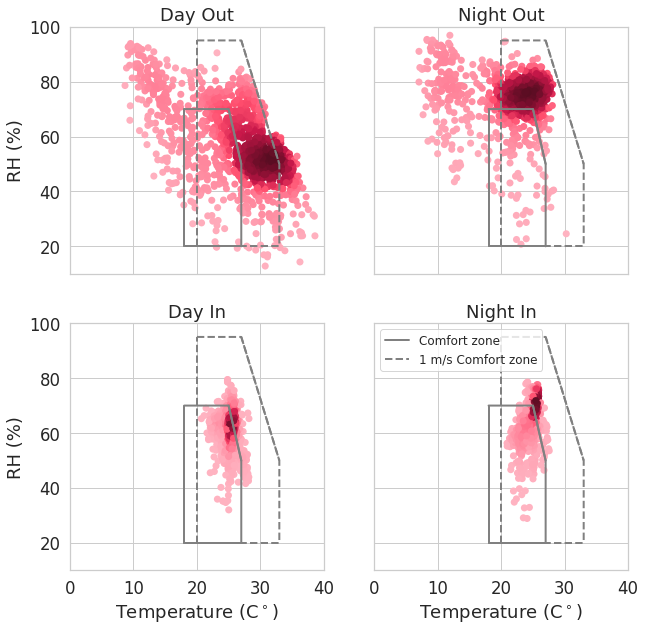

In [39]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

fig, axs = plt.subplots(2, 2,figsize=(10,10))
# create palette:
palette = ['#ffb3c1','#ff8fa3','#ff758f','#ff4d6d','#c9184a','#a4133c','#800f2f',"#590d22"]
newcmp = LinearSegmentedColormap.from_list('testCmap', colors=palette, N=256)
# ------------ OUT----------------#
## Day
x = day['Temp_out']
y = day['RH_out']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
axs[0, 0].scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)
  # comfort zone borders
axs[0, 0].plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
axs[0, 0].plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
axs[0, 0].plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
axs[0, 0].plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
axs[0, 0].plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
axs[0, 0].plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
axs[0, 0].plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
axs[0, 0].plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")


## Night
x = night['Temp_out']
y = night['RH_out']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
axs[0, 1].scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)
  # comfort zone borders
axs[0, 1].plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
axs[0, 1].plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
axs[0, 1].plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
axs[0, 1].plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
axs[0, 1].plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
axs[0, 1].plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
axs[0, 1].plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
axs[0, 1].plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")

# ------------ IN----------------#
## day
x = day['Temp_in']
y = day['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
axs[1, 0].scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)
  # comfort zone borders
axs[1, 0].plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
axs[1, 0].plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
axs[1, 0].plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
axs[1, 0].plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
axs[1, 0].plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
axs[1, 0].plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
axs[1, 0].plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
axs[1, 0].plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")

## night
x = night['Temp_in']
y = night['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
axs[1, 1].scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp )
  # comfort zone borders
axs[1, 1].plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
axs[1, 1].plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
axs[1, 1].plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
axs[1, 1].plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
axs[1, 1].plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
axs[1, 1].plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
axs[1, 1].plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
axs[1, 1].plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")

# axis labels
for ax in axs.flat:
    ax.set(xlabel="Temperature (C$^\circ$)", ylabel="RH (%)")

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

#titles:
axs[0, 0].set_title('Day Out')
axs[0, 1].set_title('Night Out')
axs[1, 0].set_title('Day In')
axs[1, 1].set_title('Night In')

#legends:
# axs[0, 0].legend(fontsize = 14)
# axs[0, 1].legend(fontsize = 14)
# axs[1, 0].legend(fontsize = 14)
axs[1, 1].legend(fontsize = 12)

# set limits
axs[0, 0].set_xlim(0,40)
axs[0, 0].set_ylim(10,100)
axs[0, 1].set_xlim(0,40)
axs[0, 1].set_ylim(10,100)
# option1
axs[1, 0].set_xlim(0,40)
axs[1, 0].set_ylim(10,100)
axs[1, 1].set_xlim(0,40)
axs[1, 1].set_ylim(10,100)
# option2:
# axs[1, 0].set_xlim(17,35)
# axs[1, 0].set_ylim(17,97)
# axs[1, 1].set_xlim(17,35)
# axs[1, 1].set_ylim(17,97)

# save:
plt.savefig(save_results_to + '4subplots_dytime_scatter.png',bbox_inches = "tight")

## Day/Night T test:


In [40]:
# Apply T test:
!pip install researchpy
import researchpy as rp
def ttest(group1,group2):
  summary, results = rp.ttest(group1= group1, group1_name= "Day",
                              group2=  group2, group2_name= "Night")

  return summary, results                              

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [41]:
list_ttest = [(day['Temp_in'],night['Temp_in']),(day['RH_in'],night['RH_in']),
              (day['Temp_out'],night['Temp_out']),(day['RH_out'],night['RH_out'])]

for pair in list_ttest:
  summary, results = ttest(pair[0],pair[1])  #aplly t test
  pval = results['results'].loc[3] #extract pvalue
  print(f"{summary},\n P value =  {round(pval,4)}")

   Variable       N       Mean        SD        SE  95% Conf.   Interval
0       Day  1245.0  25.241786  0.994182  0.028176  25.186508  25.297064
1     Night   751.0  24.681903  1.185264  0.043251  24.596996  24.766810
2  combined  1996.0  25.031129  1.103661  0.024703  24.982682  25.079576,
 P value =  0.0
   Variable       N       Mean        SD        SE  95% Conf.   Interval
0       Day  1245.0  61.702316  6.366108  0.180422  61.348351  62.056281
1     Night   751.0  64.709779  8.183050  0.298604  64.123581  65.295978
2  combined  1996.0  62.833882  7.250430  0.162287  62.515612  63.152151,
 P value =  0.0
   Variable       N       Mean        SD        SE  95% Conf.   Interval
0       Day  1245.0  26.078813  6.497860  0.184156  25.717522  26.440103
1     Night   751.0  20.830785  5.493762  0.200470  20.437235  21.224334
2  combined  1996.0  24.104229  6.643896  0.148711  23.812584  24.395874,
 P value =  0.0
   Variable       N       Mean         SD        SE  95% Conf.   Interval

In [42]:
  summary, results = rp.ttest(group1= day['Temp_in'], group1_name= "Day in Temp",
                              group2= night['Temp_in'] ,group2_name= "Night in Temp")
  results

,Independent t-test,results
0,Difference (Day in Temp - Night in Temp) =,0.5599
1,Degrees of freedom =,1994.0000
2,t =,11.3243
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.5232
7,Hedge's g =,0.5230
8,Glass's delta =,0.5632
9,Pearson's r =,0.2458


In [43]:
  summary, results = rp.ttest(group1= day['Temp_out'], group1_name= "Day out Temp",
                              group2= night['Temp_out'] ,group2_name= "Night out Temp")
  results

,Independent t-test,results
0,Difference (Day out Temp - Night out Temp) =,5.2480
1,Degrees of freedom =,1994.0000
2,t =,18.5007
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,0.8548
7,Hedge's g =,0.8545
8,Glass's delta =,0.8077
9,Pearson's r =,0.3828


In [44]:
  summary, results = rp.ttest(group1= day['RH_in'], group1_name= "Day in RH",
                              group2= night['RH_in'] ,group2_name= "Night in RH")
  results

,Independent t-test,results
0,Difference (Day in RH - Night in RH) =,-3.0075
1,Degrees of freedom =,1994.0000
2,t =,-9.1624
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.4233
7,Hedge's g =,-0.4232
8,Glass's delta =,-0.4724
9,Pearson's r =,0.2010


In [45]:
  summary, results = rp.ttest(group1= day['RH_out'], group1_name= "Day out RH",
                              group2= night['RH_out'] ,group2_name= "Night out RH")
  results

,Independent t-test,results
0,Difference (Day out RH - Night out RH) =,-15.6878
1,Degrees of freedom =,1994.0000
2,t =,-24.6587
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-1.1393
7,Hedge's g =,-1.1389
8,Glass's delta =,-1.0595
9,Pearson's r =,0.4834


## Air circulation and green wall effect

Now we want to check the affect of the plants on the thermal comfort. we will data **before the time that we had the wall in the room** and we will compare the thermal comfort between 3 groups:
1. Before we have plants.

2. With plants and with Air circulation.

3. With plants and withot Air circulation.

We found in the $CO_2$ data that between $13/11/2021-16/05/2022$ the Air circulation system did't work so and we know the date of the plantin of the wall was $05/04/2021$ so we can split the data and compare with Anova test

**We looking on 3 hour resample data!**

### import the data before the wall:
1. import the data
2. resample to 3 hours average
3. cut the df when the wall was bulit
4. Create "season" column.
5. concat the all data into 1 df


In [46]:
path = "/content/drive/MyDrive/Greenwall/LoggerNet_files/Before_the_wall_data.csv"
df_before = pd.read_csv(path) # reading the raw date (csv)
df_before = df_before[4:]

# make 'Time' the dataframe index
df_before['TIMESTAMP'] = pd.to_datetime(df_before['TIMESTAMP'])
df_before = df_before.set_index('TIMESTAMP')
df_before =df_before.astype(float, errors = 'raise') #change dtype to float

# keep with relevant columns:
df_before = df_before[['Temp_in_Avg','Rh_in_Avg','Temp_out_Avg','Rh_out_Avg']]
# rename the column names:
df_before.columns = ['Temp_in','RH_in','Temp_out','RH_out']
df_before = df_before.resample("3H").mean() #resample
df_before = df_before.loc[:"2021-04-05 00:00:00"]
# Create season column:
date = df_before.index.month*100 +df_before.index.day # array of numbers contain the month num*100 + day num
df_before['season'] = (pd.cut(date,[0,228,531,831,1130,1300], #values between them there are season
                       labels=['winter','spring','summer','autumn','winter ']) #convert the month to season
                  )
df_before['day_night'] = df_before.index.to_series().apply(f)
df_before['season'].replace({"winter ": "winter"}, inplace=True) # make sure we do not have different values of winter
df_before['season'].unique()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (1,2,3,4,5,6,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


['winter', 'spring']
Categories (4, object): ['winter' < 'spring' < 'summer' < 'autumn']

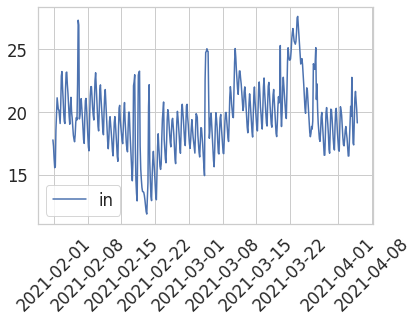

In [47]:
plt.plot(df_before['Temp_in'],label="in")
# plt.plot(df_before['Temp_out'],label="out")
plt.xticks(rotation=45)
plt.legend()

In [48]:
planting = "2021-04-05 00:00:00" #planting date
start = "2021-11-13 00:00:00" #Air circ stop
end = "2022-05-16 09:00:00" #Air circ on

In [64]:
# create df with column of values and column of class:
anova_df = df_all_hourly[['Temp_in',"RH_in","season",'day_night']]
anova_df = pd.concat([df_before,anova_df])
anova_df["groups"] = 0
anova_df['groups'][:planting] = "No_plants"
anova_df['groups'][planting:start]= "Plant_with_AC"
anova_df['groups'][start:end] = "Plant_without_AC"
anova_df['groups'][end:] = "Plant_with_AC"
anova_df.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Statistics_to_JMP.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Graphs of RH/Tmpt with and without aur circulation

In [65]:
# Create df for each group
no_plants = anova_df[anova_df['groups']=="No_plants"]
with_ac = anova_df[anova_df['groups']=="Plant_with_AC"]
without_ac = anova_df[anova_df['groups']=="Plant_without_AC"] 
# with_ac1 = anova_df[anova_df['groups']=="Plant_with_AC1"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


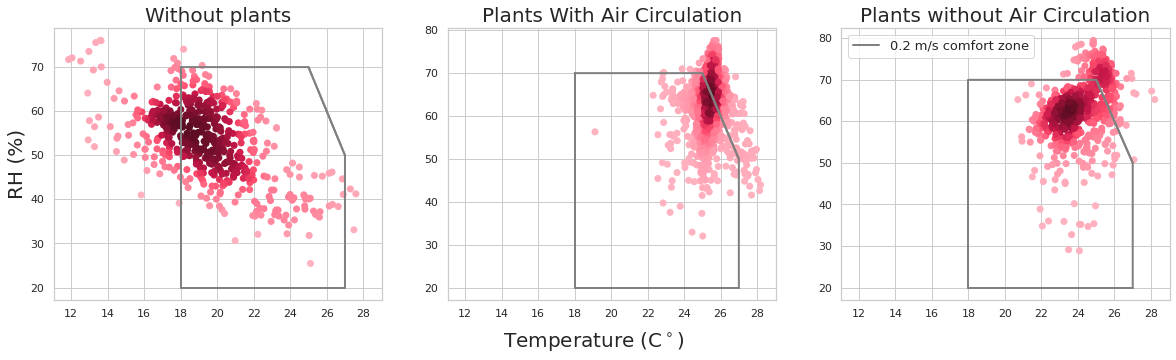

In [66]:
fig, (ax0,ax1, ax2) = plt.subplots(1, 3,sharex=True,figsize=(20,5))
# fig.suptitle('Horizontally stacked subplots')

# No plants:
# data
x = no_plants['Temp_in']
y = no_plants['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax0.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax0.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax0.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax0.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax0.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")

# titles
ax0.set_title("Without plants", fontsize = 20)
ax0.set_ylabel("RH (%)", fontsize = 20)


# With AC:
# data
x = with_ac['Temp_in']
y = with_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax1.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax1.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax1.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax1.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax1.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")

# titles
ax1.set_title("Plants with Air Circulation", fontsize = 20)
# Withot AC:
# data
x = without_ac['Temp_in']
y = without_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax2.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax2.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax2.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax2.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax2.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")


# With AC1:
# data
# x = with_ac1['Temp_in']
# y = with_ac1['RH_in']
# mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
# xy = np.vstack([x[mask], y[mask]])
# z = gaussian_kde(xy)(xy)
# ax3.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

#   # comfort zone borders
# ax3.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
# ax3.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
# ax3.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
# ax3.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")

# titles
ax0.set_ylabel("RH (%)", fontsize = 20)
ax1.set_title("Plants With Air Circulation", fontsize = 20)
ax2.set_title("Plants without Air Circulation", fontsize = 20)
# ax3.set_title("Plants with Air Circulation 2", fontsize = 20)
fig.text(0.5, 0.01, 'Temperature (C$^\circ$)', va='center', ha='center',fontsize=20)
# legend
ax2.legend(fontsize = 13)

# save
plt.savefig(save_results_to + 'AC_subplots.png',bbox_inches = "tight")

In [67]:
def Comfort(temp,rh):
  if temp < 18 or temp>27 or rh>70 or rh<20:
    return "No"
  elif temp <=25 or temp >=18:
    if rh <=70 or rh >=20:
      return "Yes"
    else:
      return "No"
  elif temp >25 or temp >=27:
    y = -6.66*temp+236.6 # line eqution
    if rh<=y:
      return "Yes"
    else:
      return "No"      

In [86]:
# dfs = [no_plants,with_ac,without_ac]
# for df in dfs:
  # df['comfort']= df.apply(lambda x: Comfort(x['Temp_in'], x['RH_in']),axis=1)
  # print(100*len(df[df['comfort']=="Yes"])/len(df))
anova_df['comfort'] = anova_df.apply(lambda x: Comfort(x['Temp_in'], x['RH_in']),axis=1)
# anova_df.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/comfort_stats.xlsx")

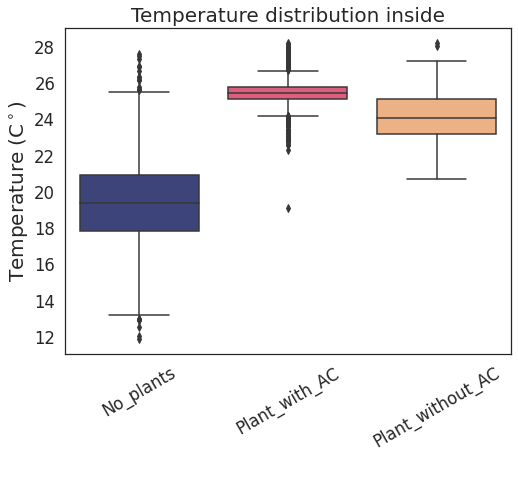

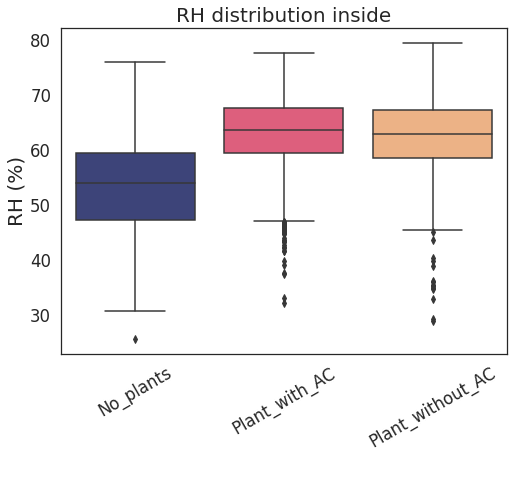

In [52]:
# Plot the boxplots:
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
# temperature
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_df, x="groups",y="Temp_in")
# ax = sns.swarmplot(data=anova_df, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("Temperature (C$^\circ$)",fontsize=20)
ax.set_title("Temperature distribution inside",fontsize=20)
plt.xticks(rotation=30)
plt.savefig(save_results_to + '4Temp_boxplots.png',bbox_inches = "tight")

# rh
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_df, x="groups",y="RH_in")
# ax = sns.swarmplot(data=anova_df, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("RH (%)",fontsize=20)
ax.set_title("RH distribution inside",fontsize=20)
plt.xticks(rotation=30)
plt.savefig(save_results_to + '4RH_boxplots.png',bbox_inches = "tight")

Now i will combine the 2 groups of working Air circ into one for comparing between with / without Air circ.

In [53]:
# create df with column of values and column of class:
anova_df = df_all_hourly[['Temp_in',"RH_in","season"]]
anova_df["groups"] = 0
anova_df['groups'][:start]= "Plant_with_AC"
anova_df['groups'][start:end] = "Plant_without_AC"
anova_df['groups'][end:] = "Plant_with_AC"
# anova_df.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Statistics_to_JMP_2groups.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


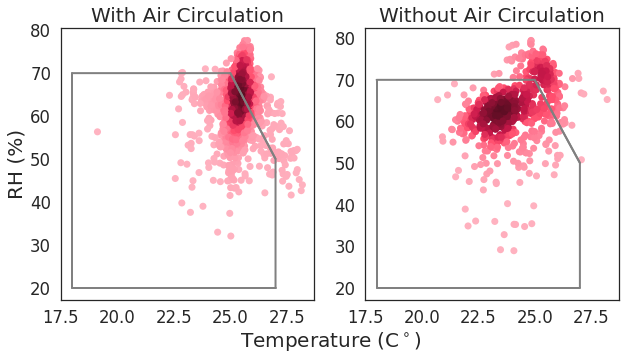

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,figsize=(10,5))
# fig.suptitle('Horizontally stacked subplots')

# With AC:
# data
x = with_ac['Temp_in']
y = with_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax1.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax1.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax1.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax1.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax1.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")
# 1 m/s comfort zone borders
# ax1.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")
# titles
ax1.set_title("With Air Circulation", fontsize = 20)
ax1.set_ylabel("RH (%)", fontsize = 20)
# Withot AC:
# data
x = without_ac['Temp_in']
y = without_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax2.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax2.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax2.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax2.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax2.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")
# # 1 m/s comfort zone borders
# ax2.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")

# titles
ax1.set_title("With Air Circulation", fontsize = 20)
ax1.set_ylabel("RH (%)", fontsize = 20)
ax2.set_title("Without Air Circulation", fontsize = 20)
fig.text(0.5, 0.01, 'Temperature (C$^\circ$)', va='center', ha='center',fontsize=20)
# legend
# ax3.legend(fontsize = 13)

# save
plt.savefig(save_results_to + 'AC_subplots_2groups.png',bbox_inches = "tight")

Text(0.5, 1.0, 'RH distribution inside')

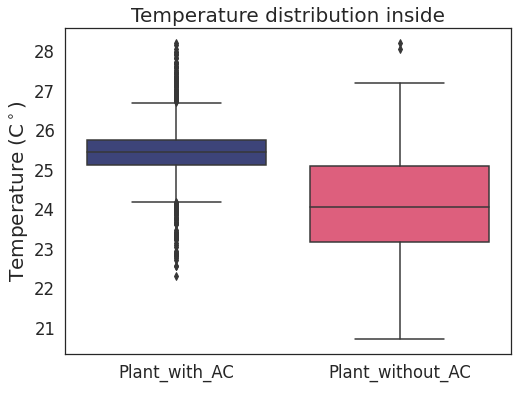

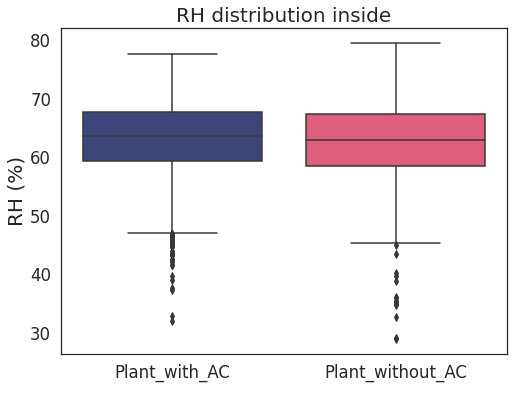

In [55]:
# Plot the boxplots:
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
# temperature
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_df, x="groups",y="Temp_in")
# ax = sns.swarmplot(data=anova_df, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("Temperature (C$^\circ$)",fontsize=20)
ax.set_title("Temperature distribution inside",fontsize=20)
# plt.xticks(rotation=30)
# plt.savefig(save_results_to + '2Temp_boxplots.png',bbox_inches = "tight")

# rh
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_df, x="groups",y="RH_in")
# ax = sns.swarmplot(data=anova_df, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("RH (%)",fontsize=20)
ax.set_title("RH distribution inside",fontsize=20)
# plt.xticks(rotation=30)
# plt.savefig(save_results_to + '2RH_boxplots.png',bbox_inches = "tight")

### Same analysis for days and night seperatly:


In [56]:
# create df with column of values and column of class:
anova_day = df_all_hourly[['Temp_in',"RH_in","season", "day_night"]]
anova_day = anova_day[anova_day['day_night']=="Day"] #just days!
anova_day["groups"] = 0
anova_day['groups'][:start]= "Plant_with_AC"
anova_day['groups'][start:end] = "Plant_without_AC"
anova_day['groups'][end:] = "Plant_with_AC"
# anova_day.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Statistics_to_JMP_Day_groups.xlsx")

# create df with column of values and column of class:
anova_night = df_all_hourly[['Temp_in',"RH_in","season", "day_night"]]
anova_night = anova_night[anova_night['day_night']=="Night"] #just days!
anova_night["groups"] = 0
anova_night['groups'][:start]= "Plant_with_AC"
anova_night['groups'][start:end] = "Plant_without_AC"
anova_night['groups'][end:] = "Plant_with_AC"
# anova_night.to_excel("/content/drive/MyDrive/Greenwall/temperture_rh_data/Charts/Statistics_to_JMP_Night_groups.xlsx")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:36: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


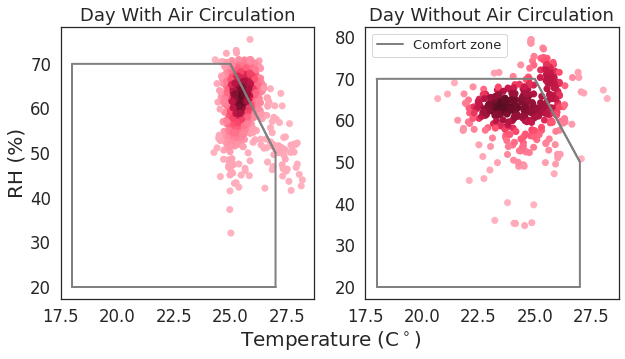

In [57]:
# Create df for each group
with_ac = anova_day[anova_day['groups']=="Plant_with_AC"]
without_ac = anova_day[anova_day['groups']=="Plant_without_AC"]

fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,figsize=(10,5))

# With AC:
# data
x = with_ac['Temp_in']
y = with_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax1.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax1.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax1.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax1.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax1.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
# ax1.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
# ax1.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")
# titles
ax1.set_title("With Air Circulation", fontsize = 20)
ax1.set_ylabel("RH (%)", fontsize = 20)
# Withot AC:
# data
x = without_ac['Temp_in']
y = without_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax2.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax2.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax2.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax2.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax2.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "Comfort zone")
# 1 m/s comfort zone borders
# ax2.plot(df2['x_bot'],df2['y_bot'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_bot'],df2['y_top'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_left'],df2['y_left'],linewidth=2,color ="grey",ls = '--')
# ax2.plot(df2['x_right'],df2['y_right'],linewidth=2,color ="grey",ls = '--',label = "1 m/s Comfort zone")

# titles
ax1.set_title("Day With Air Circulation", fontsize = 18)
ax1.set_ylabel("RH (%)", fontsize = 20)
ax2.set_title("Day Without Air Circulation", fontsize = 18)
fig.text(0.5, 0.01, 'Temperature (C$^\circ$)', va='center', ha='center',fontsize=20)
# legend
ax2.legend(fontsize = 13)

# save
# plt.savefig(save_results_to + 'Day_AC_subplots_2groups.png',bbox_inches = "tight")

In [58]:
# # Graph to poster:

# # create palette:
# palette = ['#16db65','#058c42','#04471c','#0d2818','#020202']
# newcmp = LinearSegmentedColormap.from_list('testCmap', colors=palette, N=256)
# # Theme
# sns.set_theme(style="white",palette=palette,font_scale = 1.5)
# # # Graph:
# fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,figsize=(10,5))
# # fig.suptitle('Horizontally stacked subplots')

# # With AC:
# # data
# x = with_ac['Temp_in']
# y = with_ac['RH_in']
# mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
# xy = np.vstack([x[mask], y[mask]])
# z = gaussian_kde(xy)(xy)
# ax1.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

#   # comfort zone borders
# ax1.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
# ax1.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
# ax1.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
# ax1.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 (m/s) Comfort zone")

# # titles
# ax1.set_title("With Air Circulation", fontsize = 20)
# ax1.set_ylabel("RH (%)", fontsize = 20)
# # Withot AC:
# # data
# x = without_ac['Temp_in']
# y = without_ac['RH_in']
# mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
# xy = np.vstack([x[mask], y[mask]])
# z = gaussian_kde(xy)(xy)
# ax2.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

#   # comfort zone borders
# ax2.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
# ax2.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
# ax2.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
# ax2.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 (m/s) Comfort zone")


# # titles
# ax1.set_title("With Air Circulation", fontsize = 20)
# ax1.set_ylabel("RH (%)", fontsize = 20)
# ax2.set_title("Without Air Circulation", fontsize = 20)
# fig.text(0.5, 0.01, 'Temperature (C$^\circ$)', va='center', ha='center',fontsize=20)
# # legend
# ax1.legend(loc = "lower center",fontsize = 13)
# ax2.legend(fontsize = 13)
# # plt.savefig("/content/drive/MyDrive/Yehuda_David/Papers/Poster_ISEES2022/Figures/" + 'Comfort_zone.png',bbox_inches = "tight")

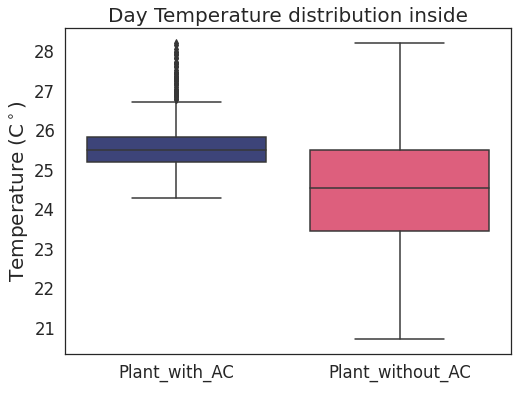

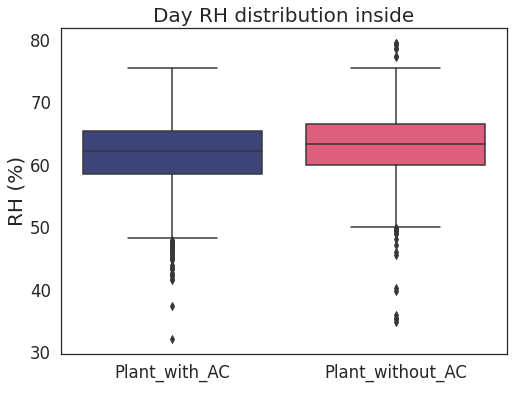

In [59]:
# Plot the boxplots:
palette = ["#333C83", "#F24A72", "#FDAF75", "#EAEA7F"]
sns.set_theme(style="white",palette=palette,font_scale = 1.5)
# temperature
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_day, x="groups",y="Temp_in")
# ax = sns.swarmplot(data=anova_day, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("Temperature (C$^\circ$)",fontsize=20)
ax.set_title("Day Temperature distribution inside",fontsize=20)
# plt.xticks(rotation=30)
plt.savefig(save_results_to + 'Day_2Temp_boxplots.png',bbox_inches = "tight")

# rh
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax = sns.boxplot(data=anova_day, x="groups",y="RH_in")
# ax = sns.swarmplot(data=anova_day, x="groups",y="Temp_in",color="black",alpha=0.5)
ax.set_xlabel(" ")
ax.set_ylabel("RH (%)",fontsize=20)
ax.set_title("Day RH distribution inside",fontsize=20)
# plt.xticks(rotation=30)
plt.savefig(save_results_to + 'Day_2RH_boxplots.png',bbox_inches = "tight")

Nights:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


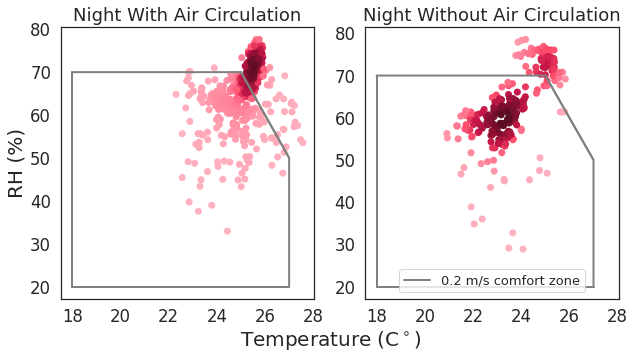

In [60]:
# Create df for each group
with_ac = anova_night[anova_night['groups']=="Plant_with_AC"]
without_ac = anova_night[anova_night['groups']=="Plant_without_AC"]

fig, (ax1, ax2) = plt.subplots(1, 2,sharex=True,figsize=(10,5))
sns.set_theme(style="whitegrid")

# With AC:
# data
x = with_ac['Temp_in']
y = with_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax1.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax1.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax1.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax1.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax1.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")

# titles
ax1.set_title("With Air Circulation", fontsize = 20)
ax1.set_ylabel("RH (%)", fontsize = 20)
# Withot AC:
# data
x = without_ac['Temp_in']
y = without_ac['RH_in']
mask = ~np.isnan(x) & ~np.isnan(y) #not nan values
xy = np.vstack([x[mask], y[mask]])
z = gaussian_kde(xy)(xy)
ax2.scatter(x[mask], y[mask], c=z, s=50, edgecolor='',cmap = newcmp)

  # comfort zone borders
ax2.plot(df1['x_bot'],df1['y_bot'],linewidth=2,color ="grey")
ax2.plot(df1['x_bot'],df1['y_top'],linewidth=2,color ="grey")
ax2.plot(df1['x_left'],df1['y_left'],linewidth=2,color ="grey")
ax2.plot(df1['x_right'],df1['y_right'],linewidth=2,color ="grey",label = "0.2 m/s comfort zone")


# titles
ax1.set_title("Night With Air Circulation", fontsize = 18)
ax1.set_ylabel("RH (%)", fontsize = 20)
ax2.set_title("Night Without Air Circulation", fontsize = 18)
fig.text(0.5, 0.01, 'Temperature (C$^\circ$)', va='center', ha='center',fontsize=20)
# legend
ax2.legend(fontsize = 13)

# save
# plt.savefig(save_results_to + 'night_AC_subplots_2groups.png',bbox_inches = "tight")